## CPMK 2 (Lanjutan Crawling)
Dari ke 4 file hasil dari 4 tahap crawl menjadi 1 file
Dikarenakan saya melakukan pengambilan data secara bertahap, maka supaya data mudah untuk diolah disini saya menggabungkan 4 file hasil pengambilan data terlebih dahulu

In [58]:
import pandas as pd
import glob
import os

# Tentukan path ke folder yang berisi file-file CSV Anda
path_folder = 'CrawlTweet'
pola_file = os.path.join(path_folder, "*.csv")
daftar_file_csv = glob.glob(pola_file)

if not daftar_file_csv:
    print(f"Tidak ada file CSV yang ditemukan di folder: {os.path.abspath(path_folder)}")
else:
    print(f"Menemukan {len(daftar_file_csv)} file CSV untuk digabungkan.")
    print(daftar_file_csv) 

    # 1. Baca dan gabungkan semua file menjadi satu DataFrame
    list_df = []
    for filename in daftar_file_csv:
        print(f"Membaca file: {filename}...")
        df = pd.read_csv(filename)
        list_df.append(df)
    
    # PERUBAHAN: Nama variabel diubah menjadi 'data'
    data = pd.concat(list_df, ignore_index=True)
    print(f"\nTotal baris data gabungan: {len(data)}")

    # 2. Siapkan folder dan path tujuan untuk menyimpan file
    folder_tujuan = 'dataset' 

    # Buat folder tujuan jika belum ada
    if not os.path.exists(folder_tujuan):
        os.makedirs(folder_tujuan)

    # Tentukan path lengkap untuk file output
    path_output = os.path.join(folder_tujuan, 'DatasetTahap1.csv')

    # 3. Simpan DataFrame yang sudah digabung ke path yang ditentukan
    # PERUBAHAN: Menggunakan variabel 'data' yang sudah konsisten
    data.to_csv(path_output, index=False, encoding='utf-8')

    print(f"File berhasil disimpan di: {path_output}")

    # 4. Tampilkan info dari DataFrame yang benar
    # PERUBAHAN: Menggunakan 'data.info()'
    print("\nInfo dari DataFrame yang disimpan:")
    data.info()

Menemukan 4 file CSV untuk digabungkan.
['CrawlTweet\\megathrust1.csv', 'CrawlTweet\\megathrust2.csv', 'CrawlTweet\\megathrust3.csv', 'CrawlTweet\\megathrust4.csv']
Membaca file: CrawlTweet\megathrust1.csv...
Membaca file: CrawlTweet\megathrust2.csv...
Membaca file: CrawlTweet\megathrust3.csv...
Membaca file: CrawlTweet\megathrust4.csv...

Total baris data gabungan: 1792
File berhasil disimpan di: dataset\DatasetTahap1.csv

Info dari DataFrame yang disimpan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1792 non-null   int64  
 1   created_at               1792 non-null   object 
 2   favorite_count           1792 non-null   int64  
 3   full_text                1792 non-null   object 
 4   id_str                   1792 non-null   int64  
 5   image_url                281 non-null    object

In [59]:
import pandas as pd

# Langsung baca file dan tampilkan 5 baris pertama
data = pd.read_csv("dataset/DatasetTahap1.csv")
print(data.head())

   conversation_id_str                      created_at  favorite_count  \
0  1608617673969274887  Fri Dec 30 00:15:14 +0000 2022             238   
1  1608333385096888320  Thu Dec 29 05:25:35 +0000 2022               1   
2  1608117866410414081  Wed Dec 28 15:09:11 +0000 2022               0   
3  1608086577812770818  Wed Dec 28 13:04:51 +0000 2022               0   
4  1608059834762670081  Wed Dec 28 11:18:35 +0000 2022               0   

                                           full_text               id_str  \
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...  1608617673969274887   
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan  1608333385096888320   
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...  1608117866410414081   
3  Ada potensi megathrust M9 geger Ada potensi ba...  1608086577812770818   
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...  1608059834762670081   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

Karena yang akan digunakan hanya kolom full text atau isi ulasan maka disimpan file csv dengan isi kolom full text untuk meringankan beban komputasi

In [60]:
data = data[["full_text"]]
print(data.tail())

                                              full_text
1787  Sejarah gempa &amp; tsunami mematikan di Indon...
1788  @tanyakanrl Istigfar lo nder! amit amit jangan...
1789  @Tan_Mar3M Nunggu megathrust menenggelamkan pu...
1790  @MintSuga97 @intinyadeh Sabar . Tunggu Gempa M...
1791  Bayangin tiba-tiba indonesia gempa megathrust ...


In [61]:
# Tentukan path folder tujuan
folder_tujuan = 'dataset' 

# Pastikan folder tujuan sudah ada, jika belum maka buat folder tersebut
# Ini adalah langkah yang baik untuk menghindari error
if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

# Gabungkan path folder dengan nama file yang diinginkan
path_output = os.path.join(folder_tujuan, 'DatasetTahap2IsiUlasan.csv')

# Simpan DataFrame ke path yang sudah ditentukan
data.to_csv(path_output, index=False, encoding='utf-8')

print(f"File berhasil disimpan di: {path_output}")

# Tetap tampilkan info DataFrame setelah menyimpan
data.info()

File berhasil disimpan di: dataset\DatasetTahap2IsiUlasan.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1792 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## CPMK 2 (Hapus data dulikat dan hapus kata kurang dari 3 huruf)

In [62]:
# Jumlah data sebelum dihapus duplikat
data.tail()

,full_text
1787,Sejarah gempa &amp; tsunami mematikan di Indon...
1788,@tanyakanrl Istigfar lo nder! amit amit jangan...
1789,@Tan_Mar3M Nunggu megathrust menenggelamkan pu...
1790,@MintSuga97 @intinyadeh Sabar . Tunggu Gempa M...
1791,Bayangin tiba-tiba indonesia gempa megathrust ...


In [63]:
import pandas as pd
import os

# --- PENGOLAHAN FILE ---

# 1. Tentukan nama file CSV yang akan diproses
nama_file_input = 'dataset/DatasetTahap2IsiUlasan.csv' # GANTI DENGAN NAMA FILE ANDA

# Pastikan file ada sebelum melanjutkan
if not os.path.exists(nama_file_input):
    print(f"Error: File tidak ditemukan di '{os.path.abspath(nama_file_input)}'")
else:
    # 2. Langsung baca satu file CSV ke dalam DataFrame
    print(f"Membaca file: '{nama_file_input}'")
    data = pd.read_csv(nama_file_input)

    print(f"\nJumlah baris sebelum menghapus duplikat: {len(data)}")

    # 3. Hapus baris duplikat berdasarkan kolom 'full_text'
    data.drop_duplicates(subset=['full_text'], inplace=True, keep='first')

    print(f"Jumlah baris setelah menghapus duplikat: {len(data)}")

    # --- PENYIMPANAN FILE ---

    # 4. Tentukan nama folder dan file output
    folder_tujuan = 'dataset'
    
    # Tentukan path lengkap untuk file output
    nama_file_output = 'DatasetTahap3HapusDuplikat.csv'
    path_output = os.path.join(folder_tujuan, nama_file_output)

    # 5. Simpan DataFrame yang sudah bersih ke file baru
    data.to_csv(path_output, index=False, encoding='utf-8')

    print(f"\nSukses! Duplikat telah dihapus dan file disimpan di:")
    print(f"'{path_output}'")

Membaca file: 'dataset/DatasetTahap2IsiUlasan.csv'

Jumlah baris sebelum menghapus duplikat: 1792
Jumlah baris setelah menghapus duplikat: 1789

Sukses! Duplikat telah dihapus dan file disimpan di:
'dataset\DatasetTahap3HapusDuplikat.csv'


In [64]:
import pandas as pd
import re
import os

# 1. Fungsi untuk menghapus kata dengan huruf <= 3
def hapus_kata_pendek(data):
    """
    Menghapus kata-kata yang panjang hurufnya <= 3.
    Contoh:
    'aku di rumah' -> 'rumah'
    'ini bagus banget' -> 'bagus banget'
    """
    if not isinstance(data, str):
        return ''
    
    # Hapus tanda baca supaya tidak mengganggu perhitungan panjang huruf
    teks_bersih = re.sub(r'[^\w\s]', '', data)
    
    # Pisahkan jadi kata-kata
    daftar_kata = teks_bersih.split()
    
    # Ambil hanya kata dengan panjang > 3 huruf
    kata_yang_disaring = [kata for kata in daftar_kata if len(kata) > 3]
    
    # Gabungkan kembali jadi kalimat
    return ' '.join(kata_yang_disaring)

# --- 2. Proses DataFrame ---
try:
    # Path file input
    path_input = os.path.join('dataset', 'DatasetTahap3HapusDuplikat.csv')
    data = pd.read_csv(path_input)
    
    print("File CSV berhasil dibaca. Berikut 5 baris pertama data asli:")
    print(data.head())
    print("-" * 50)
    
    # Ganti dengan nama kolom data kamu
    nama_kolom_asli = 'full_text'
    
    # Terapkan fungsi pembersihan
    data['teks_bersih'] = data[nama_kolom_asli].apply(hapus_kata_pendek)
    
    print("Fungsi berhasil diterapkan. Berikut hasilnya:")
    print(data[[nama_kolom_asli, 'teks_bersih']].head())
    print("-" * 50)
    
    # Simpan hasilnya ke file baru
    folder_tujuan = 'dataset'
    nama_file_output = 'DatasetTahap4HapusKurang3Huruf.csv'
    path_output = os.path.join(folder_tujuan, nama_file_output)
    
    data.to_csv(path_output, index=False, encoding='utf-8')
    
    print(f"DataFrame yang sudah bersih berhasil disimpan di: '{path_output}'")

except FileNotFoundError:
    print("Error: File tidak ditemukan. Mohon periksa kembali path file input Anda.")


File CSV berhasil dibaca. Berikut 5 baris pertama data asli:
                                           full_text
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...
3  Ada potensi megathrust M9 geger Ada potensi ba...
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...
--------------------------------------------------
Fungsi berhasil diterapkan. Berikut hasilnya:
                                           full_text  \
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...   
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan   
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...   
3  Ada potensi megathrust M9 geger Ada potensi ba...   
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...   

                                         teks_bersih  
0  Jumat 2022 pukul 062649 Samudera Hindia Nias S...  
1         httpstcosZelhi3tX9 Megathrust Jawa Selatan  
2  tahun lalu Tepatnya

## CPMK 2 (Pra Pemrosesan teks/Pre processing text)
Ada beberapa tahapan pra pemrosesn yang saya lakukan, tetapi karena kolom yang akan saya pakai hanya kolom isi ulasan X saja atau kolom yang bernama "full_text" maka saya akan menyimpan kolom tersebut kedalam satu file terlebih dahulu agar meringankan beban komputasi data.Setelah dilakukan penghapusan kata kurang dari 3 huruf didapatkan kolom baru yaitu kolom "teks_bersih", selanjutnya adalah proses preprocessing. Beberapa tahapan yang saya lakukan sebagai berikut:
1. casefolding data atau biasa disebut dengan pembersihan data seprti menyamakan hurup menjadi huruf kecil semua, menghapus karakter khusus seperti ?!@#$, dan menghapus angka.

In [65]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

full_text      0
teks_bersih    0
dtype: int64

In [66]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


#1. Casefolding data
def caseFolding(data, text_field, new_text_field_name):
    # Mengubah huruf kapital menjadi kecil
    data[new_text_field_name] = data[text_field].str.lower()
    # Menghapus karakter seperti @, #
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Menghapus angka
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return data

data_clean = caseFolding(data, 'teks_bersih', 'clean_text')
data_clean.head(10)


,full_text,teks_bersih,clean_text
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,Jumat 2022 pukul 062649 Samudera Hindia Nias S...,jumat pukul samudera hindia nias selatan dig...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,httpstcosZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu Tepatnya pada Desember 2004 pesisir...,tahun lalu tepatnya pada desember pesisir ace...
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...
5,Sebagai negara Ring of Fire dan dilalui lempen...,Sebagai negara Ring Fire dilalui lempeng2 sesa...,sebagai negara ring fire dilalui lempeng sesar...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,Waspada Potensi Tsunami Meter Selatan Jawa Tsu...,waspada potensi tsunami meter selatan jawa tsu...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,Pada Desember 2004 tsunami menerjang Aceh Gelo...,pada desember tsunami menerjang aceh gelomban...
8,Gempa megathrust bawah laut ini disebabkan ole...,Gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,Gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...


In [67]:
# 2. Normalisasi kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return "", [], [], []

# Load kamus data
kamus_data = pd.read_excel(".\kamus\kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data["tidak_baku"], kamus_data["kata_baku"]))
results = data["clean_text"].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
data["normalisasi_text"], data["kata_baku"], data["kata_tidak_baku"], data["kata_tidak_baku_Hash"] = zip(*results)
data[['full_text', 'teks_bersih', 'clean_text', 'normalisasi_text']].head(10)


,full_text,teks_bersih,clean_text,normalisasi_text
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,Jumat 2022 pukul 062649 Samudera Hindia Nias S...,jumat pukul samudera hindia nias selatan dig...,jumat pukul samudera hindia nias selatan digun...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,httpstcosZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan,tcoszelhitx megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu Tepatnya pada Desember 2004 pesisir...,tahun lalu tepatnya pada desember pesisir ace...,tahun lalu tepatnya pada desember pesisir aceh...
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...
5,Sebagai negara Ring of Fire dan dilalui lempen...,Sebagai negara Ring Fire dilalui lempeng2 sesa...,sebagai negara ring fire dilalui lempeng sesar...,sebagai negara ring fire dilalui lempeng sesar...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,Waspada Potensi Tsunami Meter Selatan Jawa Tsu...,waspada potensi tsunami meter selatan jawa tsu...,waspada potensi tsunami meter selatan jawa tsu...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,Pada Desember 2004 tsunami menerjang Aceh Gelo...,pada desember tsunami menerjang aceh gelomban...,pada desember tsunami menerjang aceh gelombang...
8,Gempa megathrust bawah laut ini disebabkan ole...,Gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,Gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...


In [68]:
# 3. tokenizing (memisahkan teks menjadi potongan potongan)

def tokenize(text):
    tokens = text.split()
    return tokens

data["tokenize"] = data["normalisasi_text"].apply(tokenize)
data.head(10)


,full_text,teks_bersih,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,Jumat 2022 pukul 062649 Samudera Hindia Nias S...,jumat pukul samudera hindia nias selatan dig...,jumat pukul samudera hindia nias selatan digun...,[],[],[],"[jumat, pukul, samudera, hindia, nias, selatan..."
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,httpstcosZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan,tcoszelhitx megathrust jawa selatan,[],[],[],"[tcoszelhitx, megathrust, jawa, selatan]"
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu Tepatnya pada Desember 2004 pesisir...,tahun lalu tepatnya pada desember pesisir ace...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi..."
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,[],[],[],"[potensi, megathrust, geger, potensi, badai, g..."
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc..."
5,Sebagai negara Ring of Fire dan dilalui lempen...,Sebagai negara Ring Fire dilalui lempeng2 sesa...,sebagai negara ring fire dilalui lempeng sesar...,sebagai negara ring fire dilalui lempeng sesar...,[],[],[],"[sebagai, negara, ring, fire, dilalui, lempeng..."
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,Waspada Potensi Tsunami Meter Selatan Jawa Tsu...,waspada potensi tsunami meter selatan jawa tsu...,waspada potensi tsunami meter selatan jawa tsu...,[],[],[],"[waspada, potensi, tsunami, meter, selatan, ja..."
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,Pada Desember 2004 tsunami menerjang Aceh Gelo...,pada desember tsunami menerjang aceh gelomban...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel..."
8,Gempa megathrust bawah laut ini disebabkan ole...,Gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,[kali],[x],[237605513291461108],"[gempa, megathrust, bawah, laut, disebabkan, o..."
9,2. Gempa bumi megathrust bawah laut terjadi ke...,Gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi..."


In [69]:
#  4. Stopword removal (menghapus kata umum atau sambung contoh yang, di, dan)

# Unduh stopwords bahasa Indonesia
nltk.download('stopwords')

# Mendapatkan stopwords bahasa Indonesia
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['stopword_removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,teks_bersih,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize,stopword_removal
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,Jumat 2022 pukul 062649 Samudera Hindia Nias S...,jumat pukul samudera hindia nias selatan dig...,jumat pukul samudera hindia nias selatan digun...,[],[],[],"[jumat, pukul, samudera, hindia, nias, selatan...","[jumat, samudera, hindia, nias, selatan, digun..."
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,httpstcosZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan,tcoszelhitx megathrust jawa selatan,[],[],[],"[tcoszelhitx, megathrust, jawa, selatan]","[tcoszelhitx, megathrust, jawa, selatan]"
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu Tepatnya pada Desember 2004 pesisir...,tahun lalu tepatnya pada desember pesisir ace...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi...","[tepatnya, desember, pesisir, aceh, disapu, ge..."
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,[],[],[],"[potensi, megathrust, geger, potensi, badai, g...","[potensi, megathrust, geger, potensi, badai, g..."
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc...","[relawan, hadapi, ancaman, bencana, megathrust..."
5,Sebagai negara Ring of Fire dan dilalui lempen...,Sebagai negara Ring Fire dilalui lempeng2 sesa...,sebagai negara ring fire dilalui lempeng sesar...,sebagai negara ring fire dilalui lempeng sesar...,[],[],[],"[sebagai, negara, ring, fire, dilalui, lempeng...","[negara, ring, fire, lempeng, sesar, patahan, ..."
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,Waspada Potensi Tsunami Meter Selatan Jawa Tsu...,waspada potensi tsunami meter selatan jawa tsu...,waspada potensi tsunami meter selatan jawa tsu...,[],[],[],"[waspada, potensi, tsunami, meter, selatan, ja...","[waspada, potensi, tsunami, meter, selatan, ja..."
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,Pada Desember 2004 tsunami menerjang Aceh Gelo...,pada desember tsunami menerjang aceh gelomban...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel...","[desember, tsunami, menerjang, aceh, gelombang..."
8,Gempa megathrust bawah laut ini disebabkan ole...,Gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,[kali],[x],[237605513291461108],"[gempa, megathrust, bawah, laut, disebabkan, o...","[gempa, megathrust, laut, disebabkan, retakan,..."
9,2. Gempa bumi megathrust bawah laut terjadi ke...,Gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi...","[gempa, bumi, megathrust, laut, lempeng, hindi..."


In [70]:
 # Step 5: Stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['steming_data'] = data['stopword_removal'].apply(lambda x:' '.join(stem_text(x)))
data.head(10)

,full_text,teks_bersih,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize,stopword_removal,steming_data
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,Jumat 2022 pukul 062649 Samudera Hindia Nias S...,jumat pukul samudera hindia nias selatan dig...,jumat pukul samudera hindia nias selatan digun...,[],[],[],"[jumat, pukul, samudera, hindia, nias, selatan...","[jumat, samudera, hindia, nias, selatan, digun...",jumat samudera hindia nias selatan guncang gem...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,httpstcosZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan,tcoszelhitx megathrust jawa selatan,[],[],[],"[tcoszelhitx, megathrust, jawa, selatan]","[tcoszelhitx, megathrust, jawa, selatan]",tcoszelhitx megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu Tepatnya pada Desember 2004 pesisir...,tahun lalu tepatnya pada desember pesisir ace...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi...","[tepatnya, desember, pesisir, aceh, disapu, ge...",tepat desember pesisir aceh sapu gelombang tsu...
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,[],[],[],"[potensi, megathrust, geger, potensi, badai, g...","[potensi, megathrust, geger, potensi, badai, g...",potensi megathrust geger potensi badai geger p...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc...","[relawan, hadapi, ancaman, bencana, megathrust...",rawan hadap ancam bencana megathrust jawa bojo...
5,Sebagai negara Ring of Fire dan dilalui lempen...,Sebagai negara Ring Fire dilalui lempeng2 sesa...,sebagai negara ring fire dilalui lempeng sesar...,sebagai negara ring fire dilalui lempeng sesar...,[],[],[],"[sebagai, negara, ring, fire, dilalui, lempeng...","[negara, ring, fire, lempeng, sesar, patahan, ...",negara ring fire lempeng sesar patah aktif waj...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,Waspada Potensi Tsunami Meter Selatan Jawa Tsu...,waspada potensi tsunami meter selatan jawa tsu...,waspada potensi tsunami meter selatan jawa tsu...,[],[],[],"[waspada, potensi, tsunami, meter, selatan, ja...","[waspada, potensi, tsunami, meter, selatan, ja...",waspada potensi tsunami meter selatan jawa tsu...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,Pada Desember 2004 tsunami menerjang Aceh Gelo...,pada desember tsunami menerjang aceh gelomban...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel...","[desember, tsunami, menerjang, aceh, gelombang...",desember tsunami terjang aceh gelombang tsunam...
8,Gempa megathrust bawah laut ini disebabkan ole...,Gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,[kali],[x],[237605513291461108],"[gempa, megathrust, bawah, laut, disebabkan, o...","[gempa, megathrust, laut, disebabkan, retakan,...",gempa megathrust laut sebab reta patah lempeng...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,Gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi...","[gempa, bumi, megathrust, laut, lempeng, hindi...",gempa bumi megathrust laut lempeng hindia doro...


In [71]:
data.isnull().sum()

full_text               0
teks_bersih             0
clean_text              0
normalisasi_text        0
kata_baku               0
kata_tidak_baku         0
kata_tidak_baku_Hash    0
tokenize                0
stopword_removal        0
steming_data            0
dtype: int64

In [72]:
import pandas as pd

data = pd.DataFrame(data[["full_text","clean_text","normalisasi_text","tokenize","stopword_removal","steming_data"]])
data.head(10)

,full_text,clean_text,normalisasi_text,tokenize,stopword_removal,steming_data
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat pukul samudera hindia nias selatan dig...,jumat pukul samudera hindia nias selatan digun...,"[jumat, pukul, samudera, hindia, nias, selatan...","[jumat, samudera, hindia, nias, selatan, digun...",jumat samudera hindia nias selatan guncang gem...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,tcoszelhitx megathrust jawa selatan,tcoszelhitx megathrust jawa selatan,"[tcoszelhitx, megathrust, jawa, selatan]","[tcoszelhitx, megathrust, jawa, selatan]",tcoszelhitx megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir ace...,tahun lalu tepatnya pada desember pesisir aceh...,"[tahun, lalu, tepatnya, pada, desember, pesisi...","[tepatnya, desember, pesisir, aceh, disapu, ge...",tepat desember pesisir aceh sapu gelombang tsu...
3,Ada potensi megathrust M9 geger Ada potensi ba...,potensi megathrust geger potensi badai geger p...,potensi megathrust geger potensi badai geger p...,"[potensi, megathrust, geger, potensi, badai, g...","[potensi, megathrust, geger, potensi, badai, g...",potensi megathrust geger potensi badai geger p...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,"[relawan, diminta, siap, hadapi, ancaman, benc...","[relawan, hadapi, ancaman, bencana, megathrust...",rawan hadap ancam bencana megathrust jawa bojo...
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring fire dilalui lempeng sesar...,sebagai negara ring fire dilalui lempeng sesar...,"[sebagai, negara, ring, fire, dilalui, lempeng...","[negara, ring, fire, lempeng, sesar, patahan, ...",negara ring fire lempeng sesar patah aktif waj...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter selatan jawa tsu...,waspada potensi tsunami meter selatan jawa tsu...,"[waspada, potensi, tsunami, meter, selatan, ja...","[waspada, potensi, tsunami, meter, selatan, ja...",waspada potensi tsunami meter selatan jawa tsu...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomban...,pada desember tsunami menerjang aceh gelombang...,"[pada, desember, tsunami, menerjang, aceh, gel...","[desember, tsunami, menerjang, aceh, gelombang...",desember tsunami terjang aceh gelombang tsunam...
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut disebabkan oleh re...,gempa megathrust bawah laut disebabkan oleh re...,"[gempa, megathrust, bawah, laut, disebabkan, o...","[gempa, megathrust, laut, disebabkan, retakan,...",gempa megathrust laut sebab reta patah lempeng...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi ketik...,gempa bumi megathrust bawah laut terjadi ketik...,"[gempa, bumi, megathrust, bawah, laut, terjadi...","[gempa, bumi, megathrust, laut, lempeng, hindi...",gempa bumi megathrust laut lempeng hindia doro...


In [73]:
folder_tujuan = 'dataset' 

if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

path_output = os.path.join(folder_tujuan, 'DatasetTahap5PraPemro.csv')
data.to_csv(path_output, index=False, encoding='utf-8')
print(f"File berhasil disimpan di: {path_output}")
data.info()

File berhasil disimpan di: dataset\DatasetTahap5PraPemro.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         1789 non-null   object
 1   clean_text        1789 non-null   object
 2   normalisasi_text  1789 non-null   object
 3   tokenize          1789 non-null   object
 4   stopword_removal  1789 non-null   object
 5   steming_data      1789 non-null   object
dtypes: object(6)
memory usage: 84.0+ KB


## Pelabelan Ulasan / Tweet

In [74]:
import pandas as pd
# Langsung baca file dan tampilkan 5 baris pertama
data = pd.read_csv("dataset/DatasetTahap5PraPemro.csv")
print(data.head())

                                           full_text  \
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...   
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan   
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...   
3  Ada potensi megathrust M9 geger Ada potensi ba...   
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...   

                                          clean_text  \
0  jumat  pukul  samudera hindia nias selatan dig...   
1                tcoszelhitx megathrust jawa selatan   
2  tahun lalu tepatnya pada desember  pesisir ace...   
3  potensi megathrust geger potensi badai geger p...   
4  relawan diminta siap hadapi ancaman bencana me...   

                                    normalisasi_text  \
0  jumat pukul samudera hindia nias selatan digun...   
1                tcoszelhitx megathrust jawa selatan   
2  tahun lalu tepatnya pada desember pesisir aceh...   
3  potensi megathrust geger potensi badai geger p...   
4  relawan diminta siap hadapi ancaman bencana

In [75]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

full_text           0
clean_text          0
normalisasi_text    0
tokenize            0
stopword_removal    0
steming_data        0
dtype: int64

In [76]:
import pandas as pd
import csv

# Membaca kamus 
positive_path = r'.\kamus\positive.tsv'
negative_path = r'.\kamus\negative.tsv'

positive_data = pd.read_csv(positive_path, sep='\t', header=None, names=['word', 'score'], skiprows=1, encoding='utf-8')
negative_data = pd.read_csv(negative_path, sep='\t', header=None, names=['word', 'score'], skiprows=1, encoding='utf-8')

# Buat kamus dengan huruf kecil dan tanpa spasi
lexicon_positive = dict(zip(positive_data['word'].str.strip().str.lower(), positive_data['score'].astype(int)))
lexicon_negative = dict(zip(negative_data['word'].str.strip().str.lower(), negative_data['score'].astype(int)))

print(f"Kata positif: {len(lexicon_positive)} | Kata negatif: {len(lexicon_negative)}")

# Logika skoring kata, penentuan polaritas berdasarkan skor
def sentiment_analysis_lexicon(text):
    score = 0
    for word in str(text).lower().split():
        word = word.strip()
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score -= abs(lexicon_negative[word])
    
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

data[['score', 'label']] = data['steming_data'].apply(
    lambda x: pd.Series(sentiment_analysis_lexicon(x))
)

print(data[['steming_data', 'score', 'label']])


Kata positif: 3607 | Kata negatif: 6607
                                           steming_data  score     label
0     jumat samudera hindia nias selatan guncang gem...     12  positive
1                   tcoszelhitx megathrust jawa selatan      0   neutral
2     tepat desember pesisir aceh sapu gelombang tsu...      6  positive
3     potensi megathrust geger potensi badai geger p...     15  positive
4     rawan hadap ancam bencana megathrust jawa bojo...     -7  negative
...                                                 ...    ...       ...
1784  sejarah gempa tsunami mati indonesia megathrus...      8  positive
1785  tanyakanrl istigfar nder amit amit tau omong d...    -27  negative
1786          tanmarm tunggu megathrust tenggelam pulau      1  positive
1787  mintsuga intinyadeh sabar tunggu gempa megathr...     11  positive
1788         bayang tibatiba indonesia gempa megathrust      6  positive

[1789 rows x 3 columns]


In [77]:
folder_tujuan = 'dataset' 

if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

path_output = os.path.join(folder_tujuan, 'DatasetTahap6HasilPelabelan.csv')
data.to_csv(path_output, index=False, encoding='utf-8')
print(f"File berhasil disimpan di: {path_output}")
data.info()

File berhasil disimpan di: dataset\DatasetTahap6HasilPelabelan.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         1789 non-null   object
 1   clean_text        1789 non-null   object
 2   normalisasi_text  1789 non-null   object
 3   tokenize          1789 non-null   object
 4   stopword_removal  1789 non-null   object
 5   steming_data      1789 non-null   object
 6   score             1789 non-null   int64 
 7   label             1789 non-null   object
dtypes: int64(1), object(7)
memory usage: 111.9+ KB


In [78]:
ulasan_negatif = data[data['label'] == 'positive']
print(ulasan_negatif[['steming_data', 'score', 'label']])

                                           steming_data  score     label
0     jumat samudera hindia nias selatan guncang gem...     12  positive
2     tepat desember pesisir aceh sapu gelombang tsu...      6  positive
3     potensi megathrust geger potensi badai geger p...     15  positive
6     waspada potensi tsunami meter selatan jawa tsu...      7  positive
7     desember tsunami terjang aceh gelombang tsunam...      2  positive
...                                                 ...    ...       ...
1783                           waspada gempa megathrust      7  positive
1784  sejarah gempa tsunami mati indonesia megathrus...      8  positive
1786          tanmarm tunggu megathrust tenggelam pulau      1  positive
1787  mintsuga intinyadeh sabar tunggu gempa megathr...     11  positive
1788         bayang tibatiba indonesia gempa megathrust      6  positive

[1213 rows x 3 columns]


In [79]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

full_text           0
clean_text          0
normalisasi_text    0
tokenize            0
stopword_removal    0
steming_data        0
score               0
label               0
dtype: int64

In [80]:
# # Langkah penghapusan data jika terdapat missing value

# # Menghapus baris dengan nilai kosong di kolom 'steming_data' atau 'label'
# data.dropna(subset=['steming_data', 'label'], inplace=True)
# # Sebelum drop
# data_awal = pd.read_csv('DatasetTahap3 hasil pelabelan.csv')
# print(f"Jumlah data awal: {len(data_awal)} baris")

# # Setelah drop
# data = data_awal.dropna(subset=['steming_data', 'label'])
# print(f"Jumlah data setelah di-drop: {len(data)} baris")

# # data.to_csv('4hasilScrapUlasanAplikasi.csv', index=False, encoding='utf-8')
# data.to_csv('Dataset Final.csv', index=False, encoding='utf-8')

## CPMK 2

Soal 
1. Penghapusan data duplikat di awal proses.
2. Penghapusan kata-kata yang kurang dari 3 huruf pada tahap pembersihan teks.
3. Penghapusan kata tema(megatrusy, indonesia, dll) yang tidak mengandung sentimen
4. Visualisasi Word Cloud untuk melihat kata yang paling sering muncul.
5. Penggunaan N-Gram (1-3) dalam pembuatan model untuk menangkap frasa yang terdiri dari 1 hingga 3 kata.

In [10]:
# 3. Penghapusan kata tema (megatrust, indonesia, dll) yang tidak mengandung sentimen
import pandas as pd
import re
import os  # Tambahkan ini untuk manipulasi path

# 1. Baca dataset
df = pd.read_csv('./dataset/DatasetTahap6HasilPelabelan.csv')

# 2. Daftar kata yang ingin dihapus
hapus_kata = ['megathrust', 'gempa', 'tsunami', 'indonesia', 'jawa']

# 3. Buat pola regex (case-insensitive)
pola = r'\b(?:' + '|'.join(map(re.escape, hapus_kata)) + r')\b'

# 4. Hapus kata dari kolom 'steming_data'
df['steming_data'] = df['steming_data'].astype(str).str.replace(pola, '', regex=True, case=False)

# 5. Bersihkan spasi ganda yang tersisa
df['steming_data'] = df['steming_data'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 6. Simpan hasilnya ke file baru
folder_tujuan = 'dataset'
nama_file_output = 'DatasetTahap7HapusKata.csv'
path_output = os.path.join(folder_tujuan, nama_file_output)

# Pastikan folder tujuan ada
os.makedirs(folder_tujuan, exist_ok=True)

# Simpan hasil
df.to_csv(path_output, index=False, encoding='utf-8')

print(f"\n✅ Sukses! File disimpan di:")
print(f"'{path_output}'")

# 7. Lihat hasil
print(df.head())



✅ Sukses! File disimpan di:
'dataset\DatasetTahap7HapusKata.csv'
                                           full_text  \
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...   
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan   
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...   
3  Ada potensi megathrust M9 geger Ada potensi ba...   
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...   

                                          clean_text  \
0  jumat  pukul  samudera hindia nias selatan dig...   
1                tcoszelhitx megathrust jawa selatan   
2  tahun lalu tepatnya pada desember  pesisir ace...   
3  potensi megathrust geger potensi badai geger p...   
4  relawan diminta siap hadapi ancaman bencana me...   

                                    normalisasi_text  \
0  jumat pukul samudera hindia nias selatan digun...   
1                tcoszelhitx megathrust jawa selatan   
2  tahun lalu tepatnya pada desember pesisir aceh...   
3  potensi megathrust geger potensi 

File CSV dengan label sentimen berhasil dibaca.


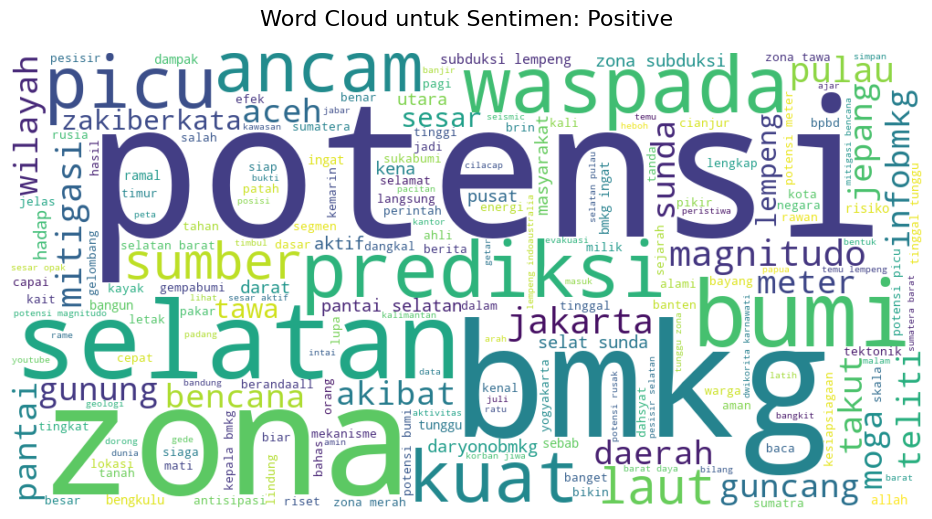

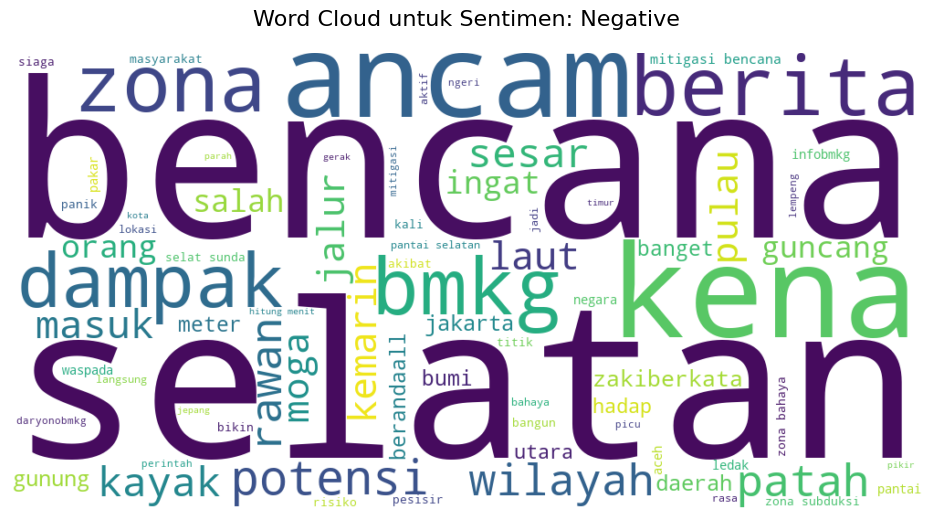

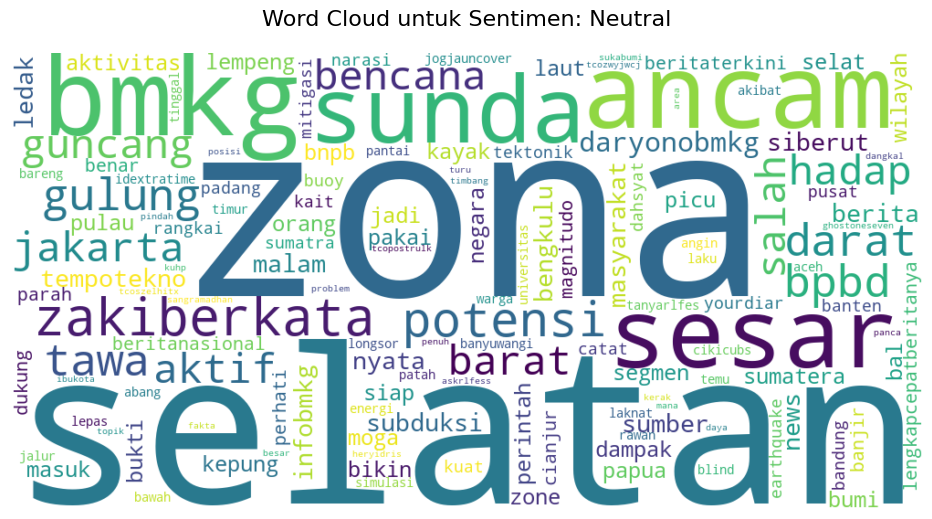

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- FUNGSI UNTUK MEMBUAT WORD CLOUD ---
def buat_wordcloud_sentimen(df, sentimen):
    """
    Fungsi untuk memfilter data berdasarkan sentimen dan membuat Word Cloud.
    - df: DataFrame yang berisi kolom 'steming_data' dan 'label'.
    - sentimen: String nama sentimen ('positive', 'negative', atau 'neutral').
    """
    # Filter DataFrame hanya untuk sentimen yang dipilih
    df_sentimen = df[df['label'] == sentimen]
    
    # Gabungkan semua teks dari data yang sudah difilter
    all_text = ' '.join(df_sentimen['steming_data'].astype(str))
    
    # Cek apakah ada teks untuk dibuat Word Cloud
    if not all_text.strip():
        print(f"Tidak ada data teks untuk sentimen '{sentimen}'. Word Cloud tidak dibuat.")
        return

    # Membuat objek WordCloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white',
                          colormap='viridis', min_font_size=10).generate(all_text)

    # Menampilkan Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # Judul dinamis sesuai sentimen
    plt.title(f"Word Cloud untuk Sentimen: {sentimen.capitalize()}", fontsize=16, pad=20)
    plt.tight_layout(pad=0)
    plt.show()

# --- CONTOH PENGGUNAAN ---

try:
    # 1. Muat data yang sudah memiliki label sentimen
    # Pastikan file ini berisi kolom 'steming_data' dan 'label'
    data = pd.read_csv("dataset/DatasetTahap7HapusKata.csv")
    print("File CSV dengan label sentimen berhasil dibaca.")

    # Pastikan tidak ada nilai kosong di kolom yang relevan
    data.dropna(subset=['steming_data', 'label'], inplace=True)
    
    # 2. Daftar sentimen yang ingin divisualisasikan
    daftar_sentimen = ['positive', 'negative', 'neutral']
    
    # 3. Buat Word Cloud untuk setiap sentimen dalam daftar
    for sentimen in daftar_sentimen:
        buat_wordcloud_sentimen(data, sentimen)

except FileNotFoundError:
    print("Error: File 'dataset/DatasetTahap6HasilPelabelan.csv' tidak ditemukan.")
except KeyError:
    print("Error: Pastikan file CSV Anda memiliki kolom 'steming_data' dan 'label'.")

Kode untuk visualisasi unigram, bigram, trigram (1-gram)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17492\3163386613.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=df, palette='viridis')
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the 

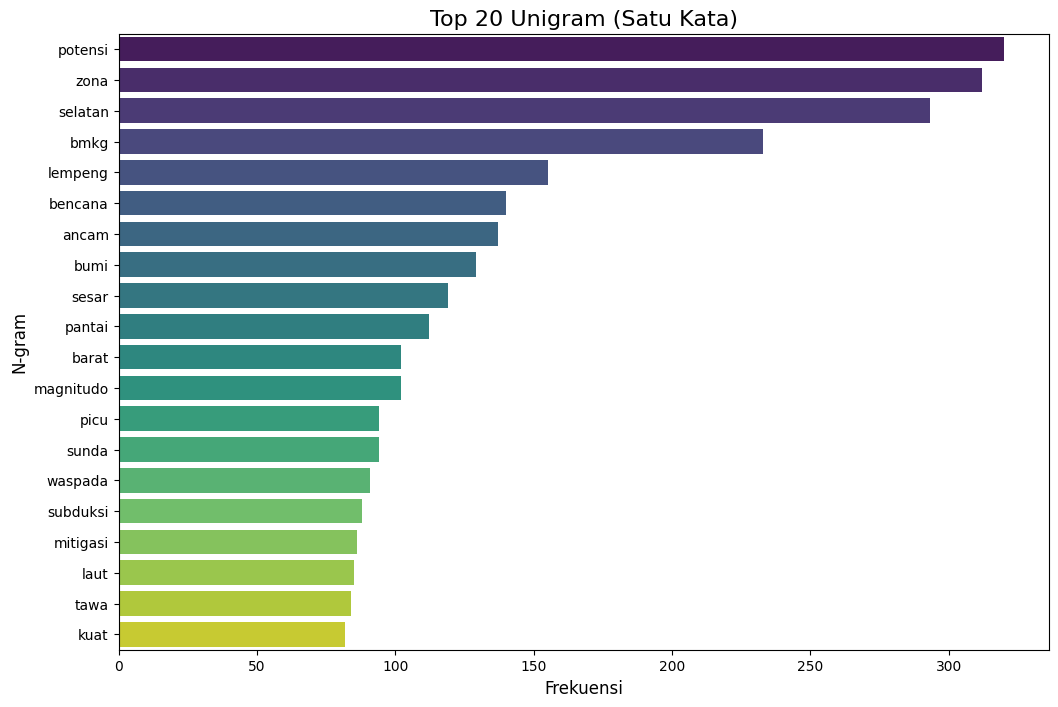

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17492\3163386613.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=df, palette='viridis')
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the 

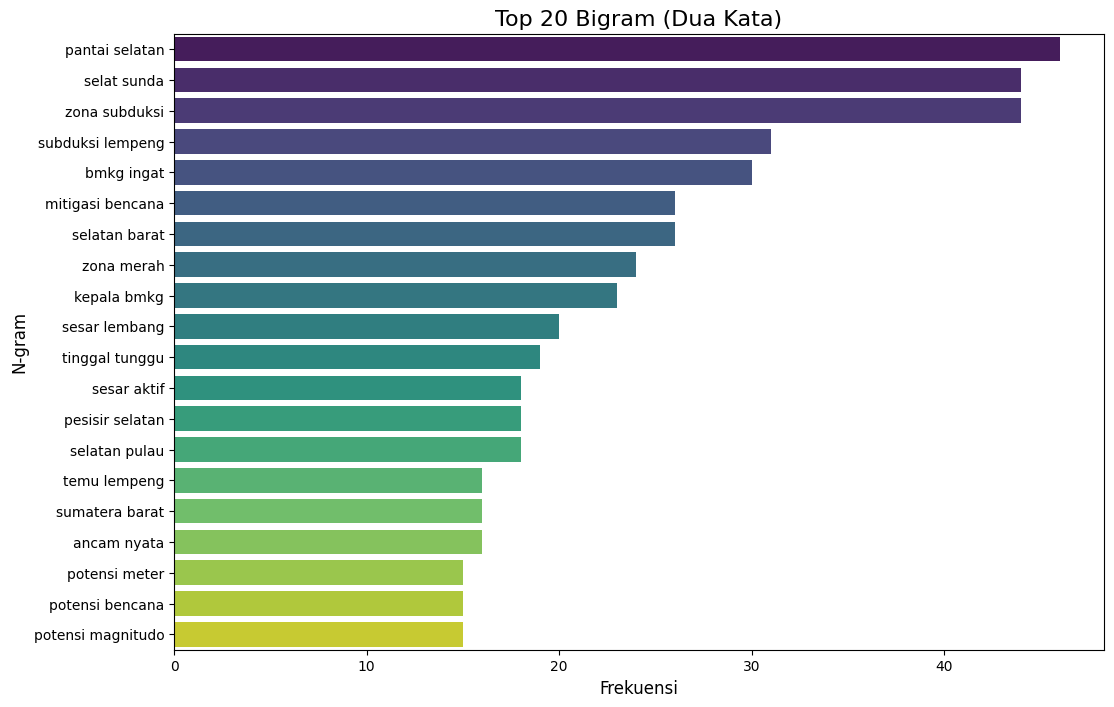

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17492\3163386613.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Ngram', data=df, palette='viridis')
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the 

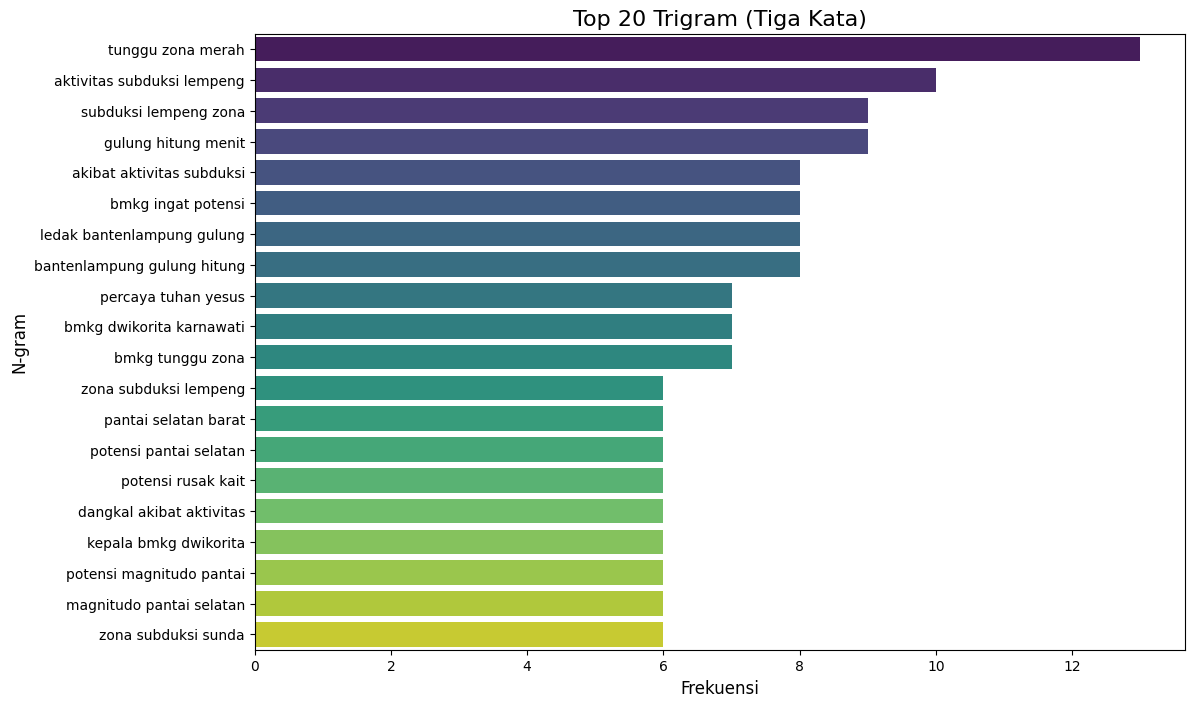

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mengekstrak dan membuat diagram N-gram
def plot_top_ngrams(corpus, title, n=20, ngram_range=(1, 1)):
    """
    Fungsi untuk membuat plot bar dari N-gram yang paling sering muncul.
    """
    try:
        vectorizer = CountVectorizer(ngram_range=ngram_range).fit(corpus)
        bag_of_words = vectorizer.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        top_ngrams = words_freq[:n]
        
        df = pd.DataFrame(top_ngrams, columns=['Ngram', 'Frekuensi'])
        
        # --- Bagian Kode untuk Membuat Diagram ---
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Frekuensi', y='Ngram', data=df, palette='viridis')
        plt.title(title, fontsize=16)
        plt.xlabel('Frekuensi', fontsize=12)
        plt.ylabel('N-gram', fontsize=12)
        plt.show()
        
    except ValueError:
        print(f"Tidak ada data atau fitur yang cukup untuk membuat diagram untuk '{title}'.")

# --- BAGIAN UTAMA ---

# Muat data Anda yang sudah bersih
data = pd.read_csv("dataset/DatasetTahap7HapusKata.csv")
data.dropna(subset=['steming_data'], inplace=True)
corpus = data['steming_data'].astype(str)

# 1. Panggil fungsi untuk membuat diagram UNIGRAM
plot_top_ngrams(corpus, title='Top 20 Unigram (Satu Kata)', n=20, ngram_range=(1, 1))

# 2. Panggil fungsi untuk membuat diagram BIGRAM
plot_top_ngrams(corpus, title='Top 20 Bigram (Dua Kata)', n=20, ngram_range=(2, 2))

# 3. Panggil fungsi untuk membuat diagram TRIGRAM
plot_top_ngrams(corpus, title='Top 20 Trigram (Tiga Kata)', n=20, ngram_range=(3, 3))

## Model Analisis

In [15]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# # 1. Memuat data dari file CSV
# data = pd.read_csv("dataset/DatasetTahap7HapusKata.csv")

# # 2. Memisahkan fitur (X) dan label (y)
# X = data['steming_data']
# y = data['label']

# # 3. Membagi data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # 4. Mengambil stopwords Bahasa Indonesia dari Sastrawi
# factory = StopWordRemoverFactory()
# stopwords_indonesia = factory.get_stop_words()

# # 5. Mengubah teks menjadi vektor fitur (Bag-of-Words)
# vectorizer = CountVectorizer(stop_words=stopwords_indonesia)
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # 6. Membuat dan melatih model Naive Bayes
# model = MultinomialNB()
# model.fit(X_train_vectorized, y_train)

# # 7. Melakukan prediksi pada data uji
# y_pred = model.predict(X_test_vectorized)

# # 8. Evaluasi model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Akurasi: {accuracy:.4f}")
# print("Laporan Klasifikasi:")
# print(classification_report(y_test, y_pred))


In [17]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Hitung jumlah label sentimen
# sentiment_count = data['label'].value_counts()

# # Atur gaya visualisasi
# sns.set_style('whitegrid')

# # Buat plot
# fig, ax = plt.subplots(figsize=(6, 4))

# # Buat barplot
# sns.barplot(x=sentiment_count.index, y=sentiment_count.values, hue=sentiment_count.index, palette='pastel', legend=False, ax=ax)

# # Judul dan label sumbu
# plt.title('Analisis Sentimen Aplikasi Siwaslu', fontsize=14, pad=20)
# plt.xlabel('Class Sentiment', fontsize=12)
# plt.ylabel('Jumlah Ulasan ', fontsize=12)

# # Tambahkan persentase ke atas batang
# total = len(data['label'])

# for i, count in enumerate(sentiment_count.values):
#     percentage = f'{100 * count / total:.2f}%'
#     ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

# # Tampilkan plot
# plt.tight_layout()
# plt.show()